# CLUSTER ANALYSIS

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey_df=pd.read_csv("/content/Survey.csv")
survey_df.head()

,City,Sex,Age,Occupation,Monthly Household Income,Income,Planning to Buy a new house,Time Frame,Reasons for buying a house,what type of House,...,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages,sex,Finished/Semi Finished.1,Influence Decision.1
0,Bangalore,M,26-35,Private Sector,"85,001 to105,000",95000,Yes,6M to 1Yr,Residing,Apartment,...,1,9,1200,72.5,30000,42500,30.5,M,Semifurnished,Site visits
1,Bangalore,M,46-60,Government/PSU,"45,001 to 65,000",55000,Yes,6M to 1Yr,Investment,Apartment,...,2,9,800,32.5,120,27500,53.0,M,Semifurnished,Newspaper
2,Bangalore,F,46-60,Government/PSU,"25,001 to 45,000",35000,Yes,<6 Months,Rental Income,Apartment,...,4,3,400,12.5,10000,10000,53.0,F,Semifurnished,Hoarding
3,Bangalore,M,36-45,Private Sector,>125000,200000,Yes,<6 Months,Investment,Apartment,...,5,3,1600,102.5,70000,80000,40.5,M,Furnished,Electronic/Internet
4,Bangalore,M,26-35,Self Employed,"85,001 to105,000",95000,Yes,1-2 Yr,Residing,Apartment,...,3,18,800,52.5,30000,42500,30.5,M,Semifurnished,Electronic/Internet


In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City                                       70 non-null     object 
 1   Sex                                        70 non-null     object 
 2   Age                                        70 non-null     object 
 3   Occupation                                 70 non-null     object 
 4   Monthly Household Income                   70 non-null     object 
 5   Income                                     70 non-null     int64  
 6   Planning to Buy a new house                70 non-null     object 
 7   Time Frame                                 70 non-null     object 
 8   Reasons for buying a house                 70 non-null     object 
 9   what type of House                         70 non-null     object 
 10  Number of rooms             

In [10]:
cols_for_clustering = survey_df.columns[18:47]
survey_numeric = survey_df[cols_for_clustering].apply(pd.to_numeric, errors='coerce')


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(survey_numeric)


In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
survey_df['Cluster'] = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# Compute average values for each cluster
cluster_centers = survey_df.groupby('Cluster')[cols_for_clustering].mean()

# Display the cluster centers as a DataFrame
cluster_centers

,2.Proximity to schools,3. Proximity to transport,4. Proximity to work place,5. Proximity to shopping,1. Gym/Pool/Sports facility,2. Parking space,3.Power back-up,4.Water supply,5.Security,1. Exterior look,...,1. Builder reputation,2. Appreciation potential,3. Profile of neighbourhood,4. Availability of domestic help,Time,Size,Budgets,Maintainances,EMI.1,ages
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.777778,4.000000,4.000000,1.777778,2.111111,2.777778,3.333333,3.222222,2.666667,2.222222,...,3.444444,3.666667,2.888889,2.333333,7.666667,577.777778,28.055556,18888.888889,23055.555556,32.944444
1,3.153846,3.884615,3.692308,2.961538,3.038462,3.538462,3.423077,3.653846,3.615385,3.538462,...,4.115385,4.307692,3.653846,3.269231,8.653846,880.769231,46.923077,25384.615385,38076.923077,41.519231
2,5.000000,3.666667,4.666667,3.833333,5.000000,4.500000,4.166667,5.000000,5.000000,4.166667,...,4.833333,3.833333,4.833333,4.666667,7.500000,2266.666667,126.250000,85000.000000,80000.000000,50.750000
3,3.933333,4.400000,4.066667,1.933333,3.266667,3.533333,3.333333,4.066667,3.666667,1.866667,...,4.600000,4.000000,3.933333,2.466667,4.600000,846.666667,44.166667,26674.666667,37166.666667,43.333333
4,3.214286,4.285714,3.428571,2.785714,3.571429,3.571429,3.642857,4.214286,3.928571,4.071429,...,4.785714,4.571429,4.285714,3.500000,7.500000,1714.285714,114.107143,65714.285714,70892.857143,55.178571


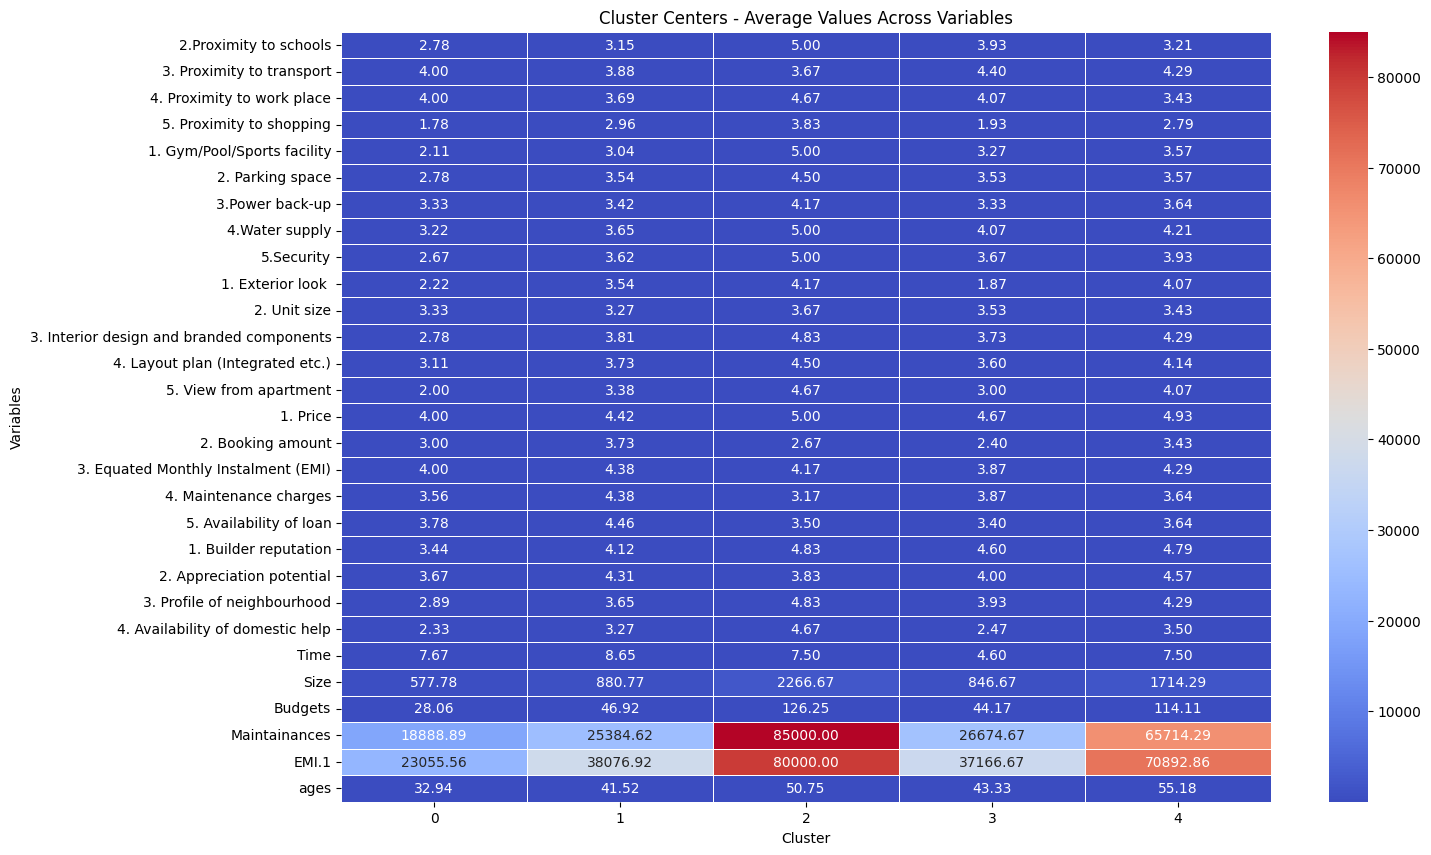

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_centers.T, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Cluster Centers - Average Values Across Variables')
plt.xlabel('Cluster')
plt.ylabel('Variables')
plt.show()
